In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


** Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


**Loading and Exploring the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/depression_data.csv')
print(df.head())

               Name  Age Marital Status    Education Level  \

0  Christine Barker   31        Married  Bachelor's Degree   

1  Jacqueline Lewis   55        Married        High School   

2    Shannon Church   78        Widowed    Master's Degree   

3    Charles Jordan   58       Divorced    Master's Degree   

4      Michael Rich   18         Single        High School   



   Number of Children Smoking Status Physical Activity Level  \

0                   2     Non-smoker                  Active   

1                   1     Non-smoker               Sedentary   

2                   1     Non-smoker               Sedentary   

3                   3     Non-smoker                Moderate   

4                   0     Non-smoker               Sedentary   



  Employment Status     Income Alcohol Consumption Dietary Habits  \

0        Unemployed   26265.67            Moderate       Moderate   

1          Employed   42710.36                High      Unhealthy   

2          Employe

In [ ]:
# Check for missing values
print(df.isnull().sum())

Name                            0

Age                             0

Marital Status                  0

Education Level                 0

Number of Children              0

Smoking Status                  0

Physical Activity Level         0

Employment Status               0

Income                          0

Alcohol Consumption             0

Dietary Habits                  0

Sleep Patterns                  0

History of Mental Illness       0

History of Substance Abuse      0

Family History of Depression    0

Chronic Medical Conditions      0

dtype: int64


In [ ]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

Calculate basic statistics like mean, median, and mode for numerical features (e.g., Age, Income).

**Exploratory Data Analysis (EDA**

In [ ]:
# Basic statistics
print(df.describe())

                 Age  Number of Children         Income

count  413768.000000       413768.000000  413768.000000

mean       49.000713            1.298972   50661.707971

std        18.158759            1.237054   40624.100565

min        18.000000            0.000000       0.410000

25%        33.000000            0.000000   21001.030000

50%        49.000000            1.000000   37520.135000

75%        65.000000            2.000000   76616.300000

max        80.000000            4.000000  209995.220000


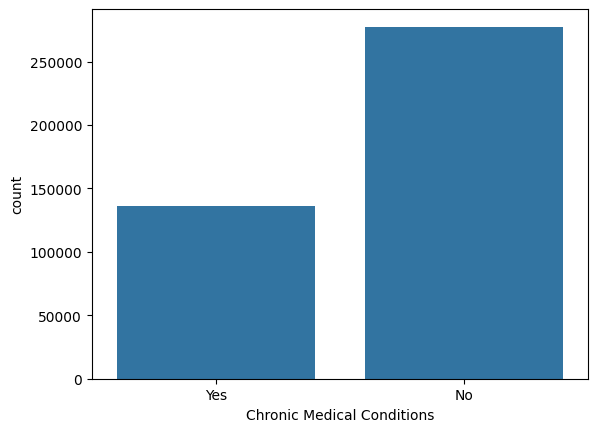

In [ ]:
# Distribution of target variable
sns.countplot(x='Chronic Medical Conditions', data=df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 413768 entries, 0 to 413767

Data columns (total 16 columns):

 #   Column                        Non-Null Count   Dtype  

---  ------                        --------------   -----  

 0   Name                          413768 non-null  object 

 1   Age                           413768 non-null  int64  

 2   Marital Status                413768 non-null  object 

 3   Education Level               413768 non-null  object 

 4   Number of Children            413768 non-null  int64  

 5   Smoking Status                413768 non-null  object 

 6   Physical Activity Level       413768 non-null  object 

 7   Employment Status             413768 non-null  object 

 8   Income                        413768 non-null  float64

 9   Alcohol Consumption           413768 non-null  object 

 10  Dietary Habits                413768 non-null  object 

 11  Sleep Patterns                413768 non-null  object 

 12  History of Mental Illness  

Distribution Analysis:

Plot distributions for categorical features (Marital Status, Smoking Status) to understand the spread of data.

Correlation Matrix:

Analyze correlations between numerical features and the target variable (Chronic Medical Conditions) to identify significant relationships.

                                 Age    Income  Number of Children  \

Age                         1.000000 -0.065628            0.259268   

Income                     -0.065628  1.000000            0.028737   

Number of Children          0.259268  0.028737            1.000000   

Chronic Medical Conditions -0.017625 -0.028427           -0.006997   



                            Chronic Medical Conditions  

Age                                          -0.017625  

Income                                       -0.028427  

Number of Children                           -0.006997  

Chronic Medical Conditions                    1.000000  


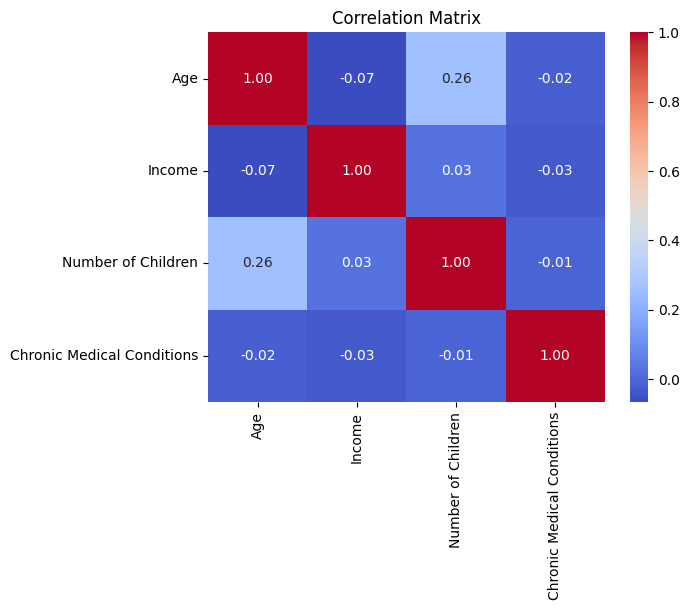

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Chronic Medical Conditions' is binary (0: No, 1: Yes), encode if not already done
#Converts the target variable into a binary numeric format.
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numerical features
numerical_features = ['Age', 'Income', 'Number of Children']

# Create a new DataFrame with only the numerical features and the target variable
#Creates a new DataFrame with only the relevant numerical features and the target variable.
corr_df = df[numerical_features + ['Chronic Medical Conditions']]

# Calculate the correlation matrix
#Calculates the Pearson correlation coefficients between the numerical features and the target variable.
corr_matrix = corr_df.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Correlation Coefficient (r):


+1: Perfect positive correlation


-1: Perfect negative correlation


0: No correlation

**Data Preprocessing**


Handling Missing Values:

Fill or drop missing values in the dataset.


Encoding Categorical Variables: Convert categorical variables ( Marital Status, Education Level) into numerical formats using techniques like One-Hot Encoding or Label Encoding.


Normalisation/Standardisation: Normalise or standardise numerical features (Income, Age) to bring them onto a comparable scale.

In [ ]:
# Define features and target
'''
 the X variable, which represents the feature matrix (the input data).
  removes the column named 'Chronic Medical Conditions' from the DataFrame df.
  axis=1 specifies that you're dropping a column (if it were axis=0, it would drop a row).
'''

'''
Result: X now contains all the columns in the DataFrame except the 'Chronic Medical Conditions' column.
These columns are the features (or independent variables) that will be used to predict the target variable.
'''

'''
y variable, which represents the target variable (the output data).
df['Chronic Medical Conditions'] extracts the 'Chronic Medical Conditions' column from the DataFrame df.
y is a Series containing the values of the 'Chronic Medical Conditions' column.
This is the variable you want to predict, often referred to as the dependent variable.
'''
'''
X (Features): All columns in the dataset except 'Chronic Medical Conditions',
which are used as input for the model.
y (Target): The 'Chronic Medical Conditions' column,
which is the outcome you want to predict based on the features in X.
'''

X = df.drop('Chronic Medical Conditions', axis=1)
y = df['Chronic Medical Conditions']



In [ ]:
# Preprocessing for numerical data
#We define the list of numerical features in your dataset that need preprocessing.

numerical_features = ['Age', 'Income', 'Number of Children']
'''
numerical_transformer is a pipeline that, when applied to the numerical features,
will first replace any missing values with the median of the respective column
and then scale the features so they all have the same scale
'''

'''
SimpleImputer: A class from scikit-learn that handles missing values in your data.
strategy='median': Specifies that missing values should be replaced with the median value of the column.
The median is often used to replace missing values because it's robust to outliers.
The data will have a mean of 0 and a standard deviation of 1 after scaling.
'''
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [ ]:
# Preprocessing for categorical
'''
categorical_features is a list that contains the names of the columns that represent categorical data.
SimpleImputer: Handles missing values in categorical data.
strategy='most_frequent': Specifies that missing values should be replaced with the most frequently occurring value (mode) in the column.
This is a common strategy for handling missing data in categorical features.


'''

# Define the categorical features
categorical_features = ['Marital Status', 'Education Level', 'Smoking Status',
                        'Physical Activity Level', 'Employment Status',
                        'Alcohol Consumption', 'Dietary Habits',
                        'Sleep Patterns', 'History of Mental Illness',
                        'History of Substance Abuse', 'Family History of Depression']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
print(numerical_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),

                ('scaler', StandardScaler())])


In [ ]:
print(numerical_features)

['Age', 'Income', 'Number of Children']


In [ ]:
print(categorical_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),

                ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
print(categorical_features)

['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression']


In [ ]:
'''
preprocessor: A combined preprocessing pipeline that:
Applies numerical_transformer to the numerical features ('Age', 'Income', 'Number of Children').
Applies categorical_transformer to the categorical features ('Marital Status', 'Education Level', 'Smoking Status').

'''
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
'''

A pipeline in the context of data science and machine learning is a sequence of data processing steps or operations that are executed in a specific order.
The purpose of a pipeline is to streamline and automate the workflow, ensuring that all necessary steps are consistently applied to the dat
'''

In [ ]:
# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])


In [ ]:
'''
Random Forest is capable of capturing complex interactions between features
because it builds multiple decision trees,
each of which can capture different patterns in the data.
individual decision trees can easily overfit,
especially if the tree is deep and the data is noisy.
Overfitting happens when a model learns the noise in the training data rather than the actual signal.

Random Forests can rank the importance of each feature in predicting the target variable.

This project involves predicting whether an individual has chronic medical conditions, which is a binary classification problem (yes or no).
Random Forest is well-suited for binary and multiclass classification tasks.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Training and Evaluation**

Accuracy: 0.61


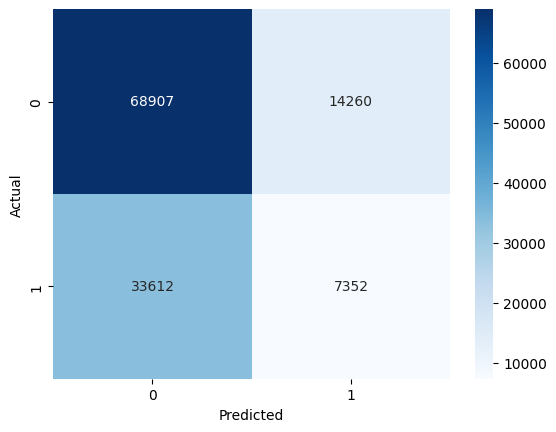

              precision    recall  f1-score   support



           0       0.67      0.83      0.74     83167

           1       0.34      0.18      0.23     40964



    accuracy                           0.61    124131

   macro avg       0.51      0.50      0.49    124131

weighted avg       0.56      0.61      0.57    124131



ROC-AUC Score: 0.51


In [ ]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')


In [ ]:
'''
accuracy_score(y_test, y_pred)
 This function calculates the accuracy of your model’s predictions.
 .2f: This formatting specifies that the accuracy should be displayed as a floating-point number with two decimal places.

'''

**Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.2f}')


In [ ]:
# Feature Importance (for Random Forest)
importance = best_model.named_steps['classifier'].feature_importances_
features = numerical_features + list(best_model.named_steps['preprocessor']
                                    .transformers_[1][1].named_steps['onehot']
                                    .get_feature_names_out(categorical_features))

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
